# カタカナ文字認識の学習サンプル

- 今回はシンプルなコードでニューラルネットワークを構築・学習できるkerasを使用する
- kerasはtensorflowの中に同梱されているため，別途インストールの必要はない
- kerasのドキュメント
  - https://keras.io/ja/ （日本語，一部未翻訳のため欠損あり） 
  - https://keras.io/ （英語）
- 使用できる層や最適化アルゴリズムはドキュメントから探してみよう

In [7]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

## データを読む

In [8]:
train_data = np.load("../1_data/train_data.npy")
train_label = np.load("../1_data/train_label.npy")
print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)

train_data.shape= (3000, 1, 28, 28)
train_label.shape= (3000, 15)


In [9]:
# 軸の入れ替え
train_data = train_data.transpose(0,2,3,1) # N H W Cにする
print(train_data.shape)

# 正規化
train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')
print(train_data)
print()

(3000, 28, 28, 1)
[[[[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [1.        ]
   [1.        ]
   [0.99607843]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.6901961 ]
   [1.        ]
   [1.        ]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.        ]
   [0.        ]
   [1.        ]]

  ...

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]]


 [[[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.99607843]
   [0.99607843]
   [0.99607843]]

  ...

  [[0.99607843]
   [0

## trainとtestに分割する（ホールドアウト法）

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_data, # 学習データ
                                                    train_label, # 教師データ
                                                    test_size=0.3, # 全体の何割をテスト用にするか
                                                    random_state=1234, # 乱数のシード値
                                                    shuffle=True # データセットを分ける前にシャッフルするかどうか
                                                   )

print(X_train.shape, X_test.shape)

(2100, 28, 28, 1) (900, 28, 28, 1)


## 学習

### 全結合ニューラルネットワーク ver.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 15)                1935      
Total params: 235,791
Trainable params: 235,791
Non-trainable params: 0
_________________________________________________________________
None
Train on 2100 samples, validate on 900 samples
Epoch 1/2
2100/2100 [==============================] - 0s 124us/sample - loss:

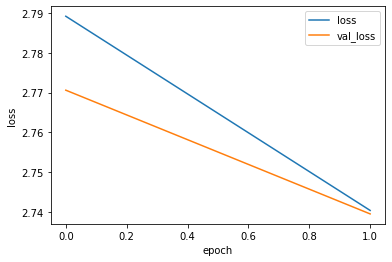

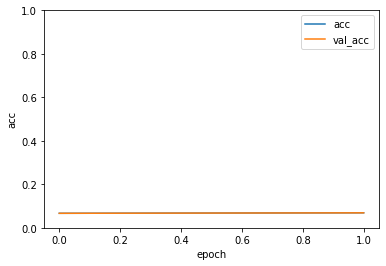

In [5]:
batch_size = 128 # バッチサイズ（一回の更新にデータをいくつ使うか）
num_classes = 15 # クラス数
epochs = 2 # エポック（データ全体を何周するか）

# input image dimensions
img_rows, img_cols = 28, 28

# 入力画像の配列形式（縦，横，チャンネル数）
input_shape = (img_rows, img_cols, 1)

model = Sequential() # 層を入れる「入れ物」を定義する

# 画像を全結合層に入れる際の前処理の定義
# Flattenは画像を一本のベクトルに変換する処理のこと
flatter = Flatten(
          input_shape=input_shape # 入力画像の配列形式
          )
model.add(flatter) # 「入れ物」に層を追加するメソッド

dense = Dense( # 層の定義．Denseは全結合層のこと
    units=256, # 出力のユニット数
    activation='sigmoid', # 活性化関数．"sigmoid"はシグモイド関数のこと．"relu"ならReLU関数，"tanh"ならTanh関数
    )
model.add(dense) # 「入れ物」に層を追加するメソッド

# 2層目の定義と追加．↑の手順をまとめて1行で書いている
model.add(Dense(units=128, activation='sigmoid')) 

# 出力層の定義と追加．分類問題の場合，活性化関数は必ず"softmax"にすること
# ちなみに回帰の場合の活性化関数は"linear"
model.add(Dense(units=num_classes, activation='softmax'))

# モデル設定のコンパイル
model.compile(loss=keras.losses.categorical_crossentropy, # 誤差関数の定義
              optimizer=keras.optimizers.SGD(), # 最適化アルゴリズムの定義．https://keras.io/ja/optimizers/ から選んで試してみよう
              metrics=['accuracy'] # 評価指標の定義
             )

# モデルの内訳を表示
print(model.summary())

#計算の実行
fit = model.fit(
          X_train, # 学習データ
          y_train, # 教師データ
          batch_size=batch_size, # バッチサイズ（一回の更新にデータをいくつ使うか）
          epochs=epochs, # エポック（データ全体を何周するか）
          verbose=1, # ログの出力方法
          validation_data=(X_test, y_test) # ホールドアウト法に使うデータ
      )

# 保存
model.save("katakana_model.hdf5")

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

#### 畳み込みニューラルネットワークver.

In [11]:
batch_size = 128
num_classes = 15
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

input_shape = (img_rows, img_cols, 1)

# モデルの定義
model = Sequential()

# 畳み込み層の定義
model.add(Conv2D(32, # フィルタ数
                 kernel_size=(3, 3), #フィルタサイズ
                 data_format="channels_last", #チャンネルの位置
                 activation='sigmoid', # 活性化関数
                 input_shape=input_shape # 入力画像の配列形式(一層目だけ指定しておけばよい)
                ))
# プーリング層の定義
model.add(MaxPooling2D(
                 pool_size=(2, 2) # フィルタサイズ
          ))
# 全結合層に入力するため，特徴マップをベクトル化する処理
model.add(Flatten())
# 全結合層の定義
model.add(Dense(128, activation='sigmoid'))
# 出力層の定義
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

# モデルの内訳を表示する
print(model.summary())

#計算の実行
fit = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

# 保存
model.save("katakana_model.hdf5")

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_6 (Dense)              (None, 15)                1935      
Total params: 694,607
Trainable params: 694,607
Non-trainable params: 0
_________________________________________________________________
None
Train on 2100 samples, validate on 900 samples
Epoch 1/10
2100/2100 [==============================] - 2s 856